In [1]:
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt

import gym
from gym import logger

import matching_bandit
from matching_bandit.agents.rank1elim import Rank1Elim
from matching_bandit.agents.rank1elimdt import Rank1ElimDT
from matching_bandit.agents.uts import UTS
from matching_bandit.utils.simulation import Experiment

logger.set_level(logger.INFO)

reps = 20 # number of repeated runs for a single agent
horizon = 3000000
time_series_frequency = horizon // 10

K = 8 # number of rows
L = 8 # number of columns

## Parameter setting

In [2]:
def simulation(K, L, p_u, p_v, delta_u, delta_v, save=False):
    row_pars = (p_u - delta_u) * np.random.uniform(size=K) 
    row_pars[0] = p_u
    col_pars = (p_v - delta_v) * np.random.uniform(size=L) 
    col_pars[0] = p_v

    agent1 = Rank1ElimDT(K, L, horizon)
    agent2 = Rank1Elim(K, L)

    env = gym.make(
        'BipartitePairBandit-v0',
        nrows = K,
        ncols = L,
        time_series_frequency = time_series_frequency
    )
    env.reset('start', row_dist=row_pars, col_dist=col_pars)
    simulation = Experiment('test', num_reps=reps, horizon=horizon)
    simulation.run(env, [agent1, agent2])
    simulation.print_lastround()
    simulation.plot(save_fig=save)
    return simulation.statistics()

## A specific problem instance

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 20000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 20000, Cumulative Regret: 14621.351620026991
INFO: Step: 40000, Cumulative Regret: 16329.273298455322
INFO: Step: 60000, Cumulative Regret: 16329.273298455322
time window 5 4294967296
INFO: Step: 80000, Cumulative Regret: 18128.490887554566
INFO: Step: 100000, Cumulative Regret: 18128.490887554566
INFO: Step: 120000, Cumulative Regret: 18128.490887554566
INFO: Step: 140000, Cumulative Regret: 18128.490887554566
INFO: Step: 160000, Cumulative Regret: 18128.490887554566
INFO: Step: 180000, Cumulative Regret: 18128.490887554566
INFO: Step: 200000, Cumulative Regret: 18128.490887554566
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 20000, Cumulative Regret: 14639.589882519394
INFO: Step: 40000, Cumulative Regret: 15879.850763256134
INFO: Step: 60000, Cumulative Regret: 1

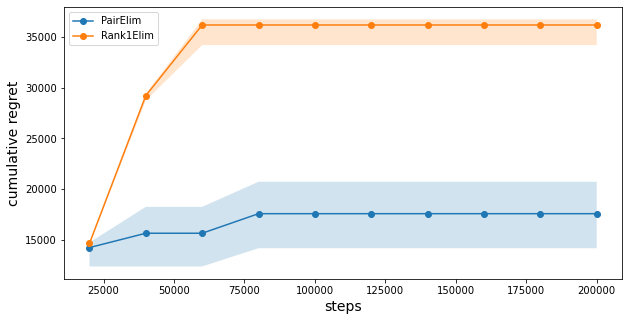

------------- Escaped time is 224.27370047569275 seconds -------------
{'mean': {'PairElim': array([14229.685719  , 15644.1312313 , 15644.1312313 , 17572.54738183,
       17572.54738183, 17572.54738183, 17572.54738183, 17572.54738183,
       17572.54738183, 17572.54738183]), 'Rank1Elim': array([14633.35813958, 29211.4247638 , 36173.27499828, 36173.27499828,
       36173.27499828, 36173.27499828, 36173.27499828, 36173.27499828,
       36173.27499828, 36173.27499828])}, 'low': {'PairElim': array([12371.155281  , 12371.155281  , 12371.155281  , 14166.44280538,
       14166.44280538, 14166.44280538, 14166.44280538, 14166.44280538,
       14166.44280538, 14166.44280538]), 'Rank1Elim': array([14489.1923854 , 28726.00715747, 34192.96110515, 34192.96110515,
       34192.96110515, 34192.96110515, 34192.96110515, 34192.96110515,
       34192.96110515, 34192.96110515])}, 'high': {'PairElim': array([14730.04556037, 18245.1991872 , 18245.1991872 , 20720.08302884,
       20720.08302884, 20720.083028

In [3]:
horizon = 200000
time_series_frequency = horizon // 10

t = time.time()
results = simulation(8, 8, 0.9, 0.9, 0.6, 0.6)
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))
print(results)

## effect of $\bar{p}$

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 300000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 25261.258365470003
INFO: Step: 600000, Cumulative Regret: 50534.20512873344
INFO: Step: 900000, Cumulative Regret: 75791.19438327721
INFO: Step: 1200000, Cumulative Regret: 101055.69099769578
INFO: Step: 1500000, Cumulative Regret: 126322.80315427491
INFO: Step: 1800000, Cumulative Regret: 151600.25409106872
INFO: Step: 2100000, Cumulative Regret: 174668.1866320916
INFO: Step: 2400000, Cumulative Regret: 180082.639728362
INFO: Step: 2700000, Cumulative Regret: 180082.639728362
INFO: Step: 3000000, Cumulative Regret: 180082.639728362
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 25274.412434458747
INFO: Step: 600000, Cumulative Regret: 50547.01522508792
INFO: Step

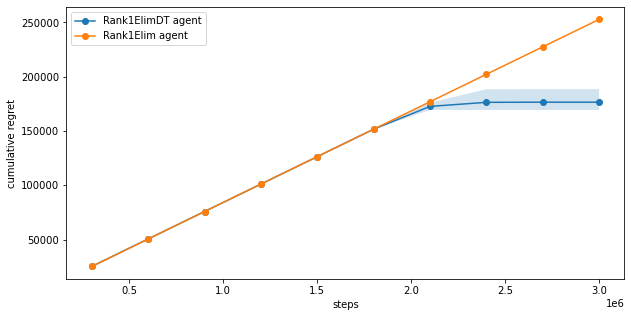

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 300000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 41733.052482030434
INFO: Step: 600000, Cumulative Regret: 81423.54131974014
INFO: Step: 900000, Cumulative Regret: 114566.74868222361
INFO: Step: 1200000, Cumulative Regret: 115190.9263820639
INFO: Step: 1500000, Cumulative Regret: 115190.9263820639
INFO: Step: 1800000, Cumulative Regret: 115190.9263820639
INFO: Step: 2100000, Cumulative Regret: 115190.9263820639
INFO: Step: 2400000, Cumulative Regret: 115190.9263820639
INFO: Step: 2700000, Cumulative Regret: 115190.9263820639
INFO: Step: 3000000, Cumulative Regret: 115190.9263820639
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 41692.036256763524
INFO: Step: 600000, Cumulative Regret: 80656.73397601148
INFO: Ste

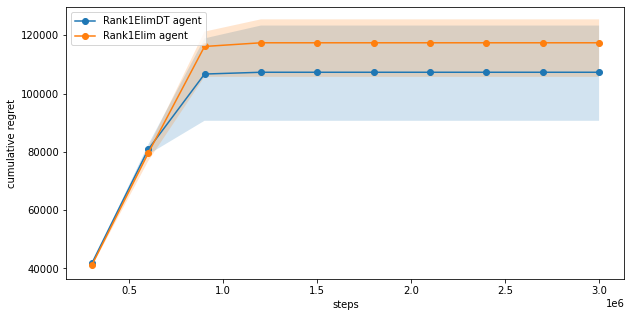

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 300000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 60350.76809903249
INFO: Step: 600000, Cumulative Regret: 71204.6172054273
INFO: Step: 900000, Cumulative Regret: 71204.6172054273
INFO: Step: 1200000, Cumulative Regret: 71204.6172054273
INFO: Step: 1500000, Cumulative Regret: 71204.6172054273
INFO: Step: 1800000, Cumulative Regret: 71204.6172054273
INFO: Step: 2100000, Cumulative Regret: 71204.6172054273
INFO: Step: 2400000, Cumulative Regret: 71204.6172054273
INFO: Step: 2700000, Cumulative Regret: 71204.6172054273
INFO: Step: 3000000, Cumulative Regret: 71204.6172054273
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 59898.57774206154
INFO: Step: 600000, Cumulative Regret: 65901.56477253792
INFO: Step: 900000, C

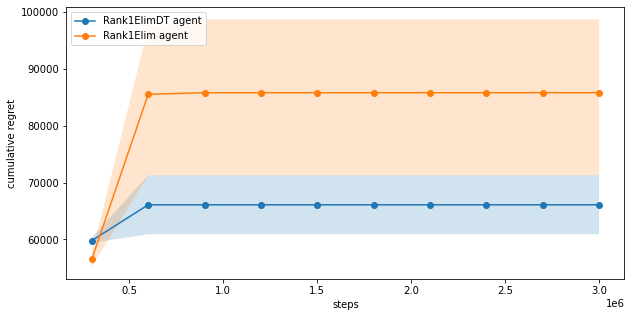

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 300000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 44722.706077220726
INFO: Step: 600000, Cumulative Regret: 44722.706077220726
INFO: Step: 900000, Cumulative Regret: 44722.706077220726
INFO: Step: 1200000, Cumulative Regret: 44722.706077220726
INFO: Step: 1500000, Cumulative Regret: 44722.706077220726
INFO: Step: 1800000, Cumulative Regret: 44722.706077220726
INFO: Step: 2100000, Cumulative Regret: 44722.706077220726
INFO: Step: 2400000, Cumulative Regret: 44722.706077220726
INFO: Step: 2700000, Cumulative Regret: 44722.706077220726
INFO: Step: 3000000, Cumulative Regret: 44722.706077220726
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 41756.98141555391
INFO: Step: 600000, Cumulative Regret: 41756.98141555391
IN

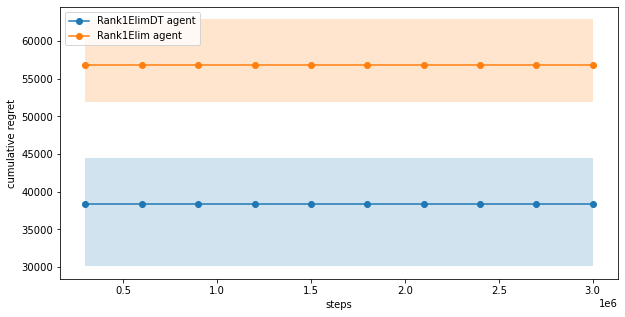

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 300000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 28363.14519653012
INFO: Step: 600000, Cumulative Regret: 28363.14519653012
INFO: Step: 900000, Cumulative Regret: 28363.14519653012
INFO: Step: 1200000, Cumulative Regret: 28363.14519653012
INFO: Step: 1500000, Cumulative Regret: 28363.14519653012
INFO: Step: 1800000, Cumulative Regret: 28363.14519653012
INFO: Step: 2100000, Cumulative Regret: 28363.14519653012
INFO: Step: 2400000, Cumulative Regret: 28363.14519653012
INFO: Step: 2700000, Cumulative Regret: 28363.14519653012
INFO: Step: 3000000, Cumulative Regret: 28363.14519653012
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 30083.18503846513
INFO: Step: 600000, Cumulative Regret: 30083.18503846513
INFO: Step: 

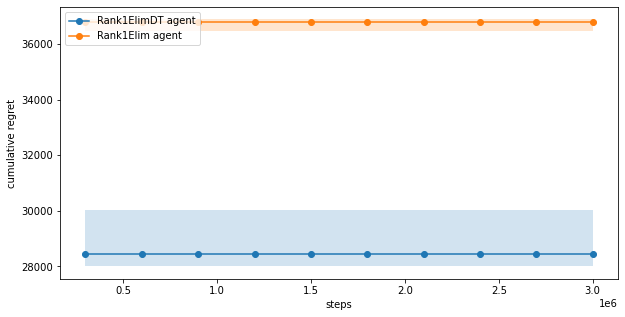

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 300000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 21338.200312620986
INFO: Step: 600000, Cumulative Regret: 21338.200312620986
INFO: Step: 900000, Cumulative Regret: 21338.200312620986
INFO: Step: 1200000, Cumulative Regret: 21338.200312620986
INFO: Step: 1500000, Cumulative Regret: 21338.200312620986
INFO: Step: 1800000, Cumulative Regret: 21338.200312620986
INFO: Step: 2100000, Cumulative Regret: 21338.200312620986
INFO: Step: 2400000, Cumulative Regret: 21338.200312620986
INFO: Step: 2700000, Cumulative Regret: 21338.200312620986
INFO: Step: 3000000, Cumulative Regret: 21338.200312620986
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 18744.744138937585
INFO: Step: 600000, Cumulative Regret: 18744.744138937585


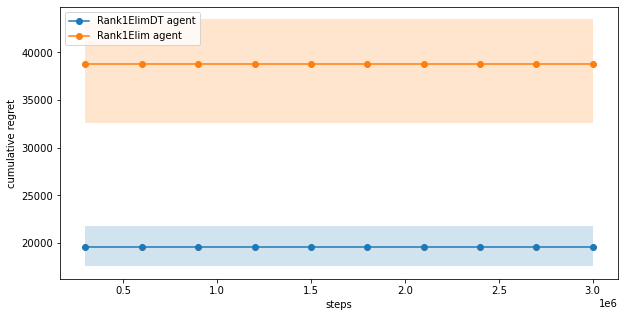

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 300000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 12178.38645434644
INFO: Step: 600000, Cumulative Regret: 12178.38645434644
INFO: Step: 900000, Cumulative Regret: 12178.38645434644
INFO: Step: 1200000, Cumulative Regret: 12178.38645434644
INFO: Step: 1500000, Cumulative Regret: 12178.38645434644
INFO: Step: 1800000, Cumulative Regret: 12178.38645434644
INFO: Step: 2100000, Cumulative Regret: 12178.38645434644
INFO: Step: 2400000, Cumulative Regret: 12178.38645434644
INFO: Step: 2700000, Cumulative Regret: 12178.38645434644
INFO: Step: 3000000, Cumulative Regret: 12178.38645434644
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
time window 5 4294967296
INFO: Step: 300000, Cumulative Regret: 13254.80255968359
INFO: Step: 600000, Cumulative Regret: 13254.80255968359
INFO: Step: 

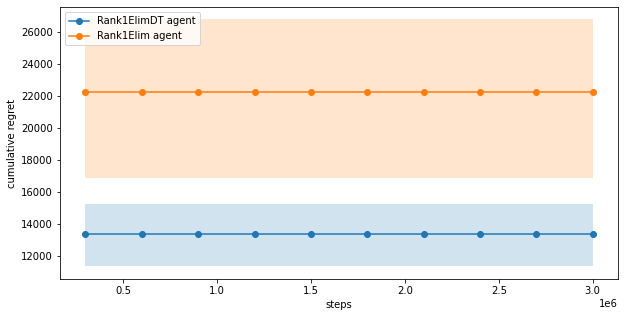

------------- Escaped time is 21220.871242523193 seconds -------------


In [3]:
p_max = np.linspace(0.3, 0.9, num=7)

delta_u = 0.2
delta_v = 0.2

t = time.time()

for p in p_max:
    simulation(K, L, p, p, delta_u, delta_v)
        
print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))

## effect of $\delta$

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 30000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 10330.10043516941
INFO: Step: 60000, Cumulative Regret: 10330.10043516941
time window 5 4294967296
INFO: Step: 90000, Cumulative Regret: 14052.072571749226
INFO: Step: 120000, Cumulative Regret: 14052.072571749226
INFO: Step: 150000, Cumulative Regret: 14052.072571749226
INFO: Step: 180000, Cumulative Regret: 14052.072571749226
INFO: Step: 210000, Cumulative Regret: 14052.072571749226
INFO: Step: 240000, Cumulative Regret: 14052.072571749226
INFO: Step: 270000, Cumulative Regret: 14052.072571749226
INFO: Step: 300000, Cumulative Regret: 14052.072571749226
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 11586.480754080263
INFO: Step: 60000, Cumulative Regret: 12962.09513008363
time window 5 4294967296
INFO: Step: 9000

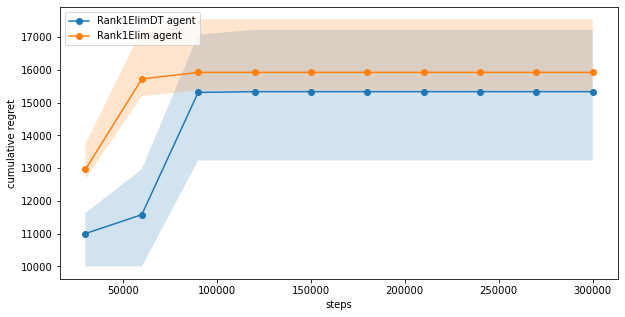

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 30000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 11543.434184232234
INFO: Step: 60000, Cumulative Regret: 11543.434184232234
time window 5 4294967296
INFO: Step: 90000, Cumulative Regret: 14264.038729235184
INFO: Step: 120000, Cumulative Regret: 14264.038729235184
INFO: Step: 150000, Cumulative Regret: 14264.038729235184
INFO: Step: 180000, Cumulative Regret: 14264.038729235184
INFO: Step: 210000, Cumulative Regret: 14264.038729235184
INFO: Step: 240000, Cumulative Regret: 14264.038729235184
INFO: Step: 270000, Cumulative Regret: 14264.038729235184
INFO: Step: 300000, Cumulative Regret: 14264.038729235184
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 12561.962864869887
INFO: Step: 60000, Cumulative Regret: 12561.962864869887
time window 5 4294967296
INFO: Step: 9

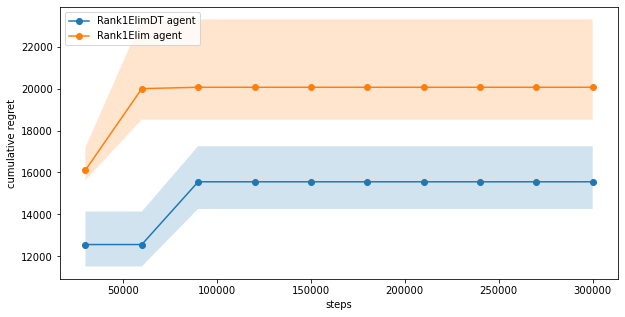

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 30000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 11543.727784172313
INFO: Step: 60000, Cumulative Regret: 11543.727784172313
time window 5 4294967296
INFO: Step: 90000, Cumulative Regret: 15084.55102609263
INFO: Step: 120000, Cumulative Regret: 15084.55102609263
INFO: Step: 150000, Cumulative Regret: 15084.55102609263
INFO: Step: 180000, Cumulative Regret: 15084.55102609263
INFO: Step: 210000, Cumulative Regret: 15084.55102609263
INFO: Step: 240000, Cumulative Regret: 15084.55102609263
INFO: Step: 270000, Cumulative Regret: 15084.55102609263
INFO: Step: 300000, Cumulative Regret: 15084.55102609263
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 10279.447746311378
INFO: Step: 60000, Cumulative Regret: 10279.447746311378
time window 5 4294967296
INFO: Step: 90000, Cu

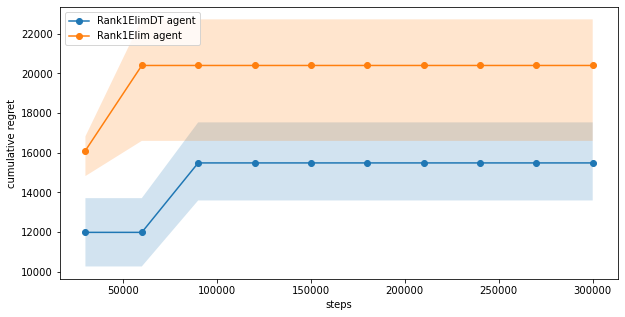

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 30000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 14516.416689325266
INFO: Step: 60000, Cumulative Regret: 14516.416689325266
time window 5 4294967296
INFO: Step: 90000, Cumulative Regret: 16759.597322806632
INFO: Step: 120000, Cumulative Regret: 16759.597322806632
INFO: Step: 150000, Cumulative Regret: 16759.597322806632
INFO: Step: 180000, Cumulative Regret: 16759.597322806632
INFO: Step: 210000, Cumulative Regret: 16759.597322806632
INFO: Step: 240000, Cumulative Regret: 16759.597322806632
INFO: Step: 270000, Cumulative Regret: 16759.597322806632
INFO: Step: 300000, Cumulative Regret: 16759.597322806632
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 12178.245708821018
INFO: Step: 60000, Cumulative Regret: 12178.245708821018
time window 5 4294967296
INFO: Step: 9

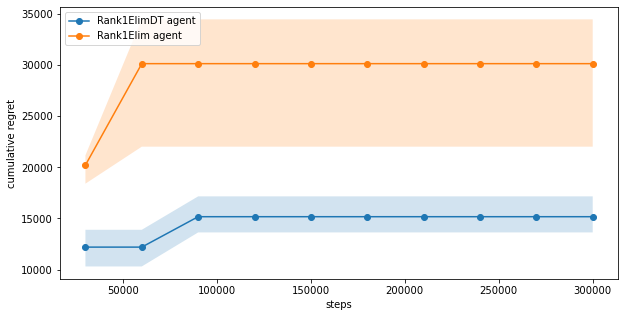

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 30000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 15918.469674970298
INFO: Step: 60000, Cumulative Regret: 15918.469674970298
time window 5 4294967296
INFO: Step: 90000, Cumulative Regret: 18227.912188306636
INFO: Step: 120000, Cumulative Regret: 18227.912188306636
INFO: Step: 150000, Cumulative Regret: 18227.912188306636
INFO: Step: 180000, Cumulative Regret: 18227.912188306636
INFO: Step: 210000, Cumulative Regret: 18227.912188306636
INFO: Step: 240000, Cumulative Regret: 18227.912188306636
INFO: Step: 270000, Cumulative Regret: 18227.912188306636
INFO: Step: 300000, Cumulative Regret: 18227.912188306636
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 11494.113159049246
INFO: Step: 60000, Cumulative Regret: 11494.113159049246
time window 5 4294967296
INFO: Step: 9

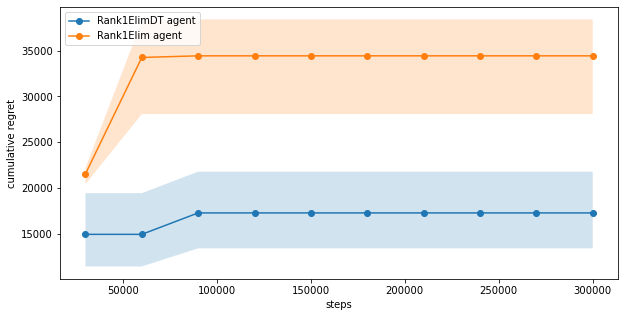

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 30000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 16486.017641278522
INFO: Step: 60000, Cumulative Regret: 16486.017641278522
time window 5 4294967296
INFO: Step: 90000, Cumulative Regret: 18346.738568235567
INFO: Step: 120000, Cumulative Regret: 18346.738568235567
INFO: Step: 150000, Cumulative Regret: 18346.738568235567
INFO: Step: 180000, Cumulative Regret: 18346.738568235567
INFO: Step: 210000, Cumulative Regret: 18346.738568235567
INFO: Step: 240000, Cumulative Regret: 18346.738568235567
INFO: Step: 270000, Cumulative Regret: 18346.738568235567
INFO: Step: 300000, Cumulative Regret: 18346.738568235567
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 17064.41882696847
INFO: Step: 60000, Cumulative Regret: 17064.41882696847
time window 5 4294967296
INFO: Step: 900

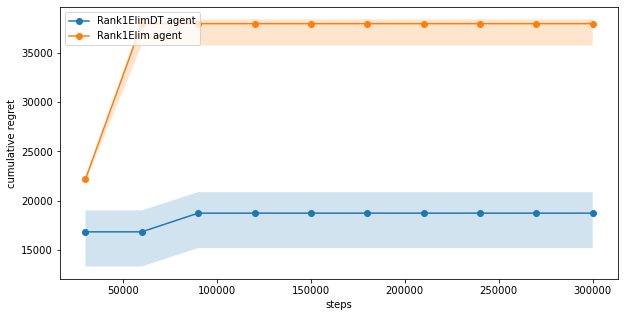

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 30000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 20124.695897044086
INFO: Step: 60000, Cumulative Regret: 20124.695897044086
time window 5 4294967296
INFO: Step: 90000, Cumulative Regret: 22066.771308018182
INFO: Step: 120000, Cumulative Regret: 22066.771308018182
INFO: Step: 150000, Cumulative Regret: 22066.771308018182
INFO: Step: 180000, Cumulative Regret: 22066.771308018182
INFO: Step: 210000, Cumulative Regret: 22066.771308018182
INFO: Step: 240000, Cumulative Regret: 22066.771308018182
INFO: Step: 270000, Cumulative Regret: 22066.771308018182
INFO: Step: 300000, Cumulative Regret: 22066.771308018182
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 17753.352967751907
INFO: Step: 60000, Cumulative Regret: 17753.352967751907
time window 5 4294967296
INFO: Step: 9

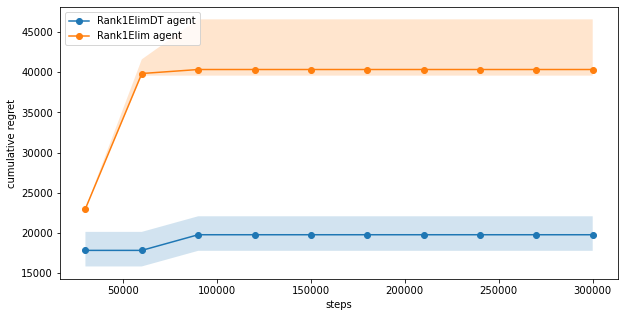

INFO: Making new env: BipartitePairBandit-v0 ({'nrows': 8, 'ncols': 8, 'time_series_frequency': 30000})
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 18588.53931625956
INFO: Step: 60000, Cumulative Regret: 18588.53931625956
time window 5 4294967296
INFO: Step: 90000, Cumulative Regret: 20716.160338323753
INFO: Step: 120000, Cumulative Regret: 20716.160338323753
INFO: Step: 150000, Cumulative Regret: 20716.160338323753
INFO: Step: 180000, Cumulative Regret: 20716.160338323753
INFO: Step: 210000, Cumulative Regret: 20716.160338323753
INFO: Step: 240000, Cumulative Regret: 20716.160338323753
INFO: Step: 270000, Cumulative Regret: 20716.160338323753
INFO: Step: 300000, Cumulative Regret: 20716.160338323753
time window 1 4
time window 2 16
time window 3 256
time window 4 65536
INFO: Step: 30000, Cumulative Regret: 17778.878009206925
INFO: Step: 60000, Cumulative Regret: 17778.878009206925
time window 5 4294967296
INFO: Step: 900

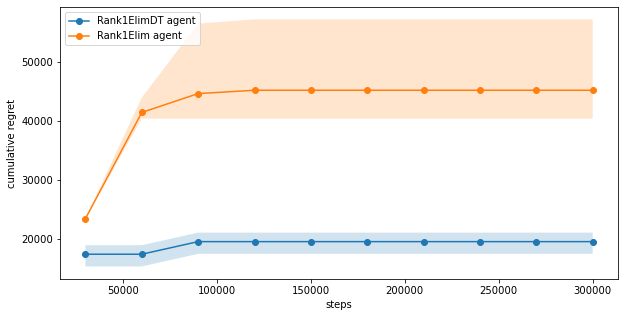

------------- Escaped time is 2625.3150565624237 seconds -------------


In [5]:
p_u = 0.9
p_v = 0.9

deltas = np.linspace(0.1, 0.8, num=8)

horizon = 300000
time_series_frequency = horizon // 10

t = time.time()

for delta in deltas:
    simulation(K, L, p_u, p_v, delta, delta)

print('------------- Escaped time is {0} seconds -------------'.format(time.time() - t))